# Collision Prediction

![banner](banner.jpeg)

<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>OVERVIEW</h2>
</div>

## Purpose

The goal of this project is to develop a predictive software tool that can assess the likelihood of fatal collisions, benefiting both the police department and the general public. For law enforcement, the tool will aid in enhancing security measures and planning road conditions in specific neighborhoods. Meanwhile, individuals will be able to utilize the tool to evaluate the necessity for additional precautions based on factors such as weather conditions and time. Leveraging a dataset collected by the Toronto police department over five years, the project aims to create a predictive service that can classify incidents as either resulting in fatality or not, using relevant features.

## Dataset

The dataset used in this project is sourced from the Toronto Police Service's official data repository. For more information, visit [here](https://data.torontopolice.on.ca/datasets/TorontoPS::ksi/about).

This dataset encompasses traffic collision events resulting in either fatalities or serious injuries (KSI) from 2006 to 2022 within Toronto. To comply with privacy regulations, the Toronto Police Service has safeguarded the personal information of individuals involved in these incidents. Location data has been intentionally obscured to the nearest road intersection node to ensure privacy. Users should regard all location information as approximations, not tied to specific addresses or individuals. While intended to inform communities about public safety, the data is preliminary and may not be fully verified.

<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>DATA EXPLORATION</h2>
</div>

## Info of Data

In [355]:
# Load Data
import pandas as pd
data = pd.read_csv('KSI.csv')

In [356]:
# column names, data types, none null values count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [357]:
# Statistical assessments, 
# Including count, mean, standard deviation, min, max, percentiles
data.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.819400e+04,1.819400e+04,1.819400e+04,1.326400e+04,18194.000000,18194.000000,1.733200e+04,18194.000000,18194.000000,827.000000,18194.000000
mean,-8.838345e+06,5.420748e+06,3.818870e+07,4.248444e+08,2012.934869,1362.615917,2.521028e+03,43.710459,-79.396201,29.073761,9097.500000
std,1.162533e+04,8.682160e+03,3.726463e+07,1.065503e+09,4.754258,630.816048,1.844803e+05,0.056369,0.104432,17.803627,5252.299734
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846591e+06,5.413242e+06,5.391370e+06,1.021229e+06,2009.000000,920.000000,7.000000e+00,43.661727,-79.470280,14.000000,4549.250000
50%,-8.838448e+06,5.419556e+06,7.644612e+06,1.197308e+06,2012.000000,1450.000000,1.300000e+01,43.702745,-79.397132,28.000000,9097.500000
75%,-8.829671e+06,5.427813e+06,8.078261e+07,1.365020e+06,2017.000000,1850.000000,2.200000e+01,43.756345,-79.318286,42.000000,13645.750000
max,-8.807929e+06,5.443099e+06,8.170606e+07,4.008024e+09,2022.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,18194.000000


In [358]:
# Evaluate and summarize null values
null_cols = data.columns[data.isnull().any()]
null_counts = data[null_cols].isnull().sum()

# Sort by the number of null values
null_counts_sorted = null_counts.sort_values(ascending=False)
print(null_counts_sorted)

EMERG_VEH        18151
DISABILITY       17708
CYCCOND          17429
CYCACT           17428
CYCLISTYPE       17420
ALCOHOL          17406
FATAL_NO         17367
TRSN_CITY_VEH    17084
TRUCK            17072
REDLIGHT         16674
MOTORCYCLE       16607
CYCLIST          16288
SPEEDING         15619
PEDTYPE          15134
PEDACT           15112
PEDCOND          15110
OFFSET           14792
PASSENGER        11288
PEDESTRIAN       10840
DRIVCOND          8954
DRIVACT           8951
AG_DRIV           8734
INJURY            8567
MANOEUVER         7660
ACCLOC            5450
INITDIR           5052
ACCNUM            4930
VEHTYPE           3228
STREET2           1684
AUTOMOBILE        1644
WARDNUM            862
ROAD_CLASS         376
DISTRICT           105
LOCCOORD            95
TRAFFCTL            34
RDSFCOND            25
VISIBILITY          20
INVTYPE             16
ACCLASS              5
IMPACTYPE            4
dtype: int64


## Visualizing Data

### Graphical Data

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

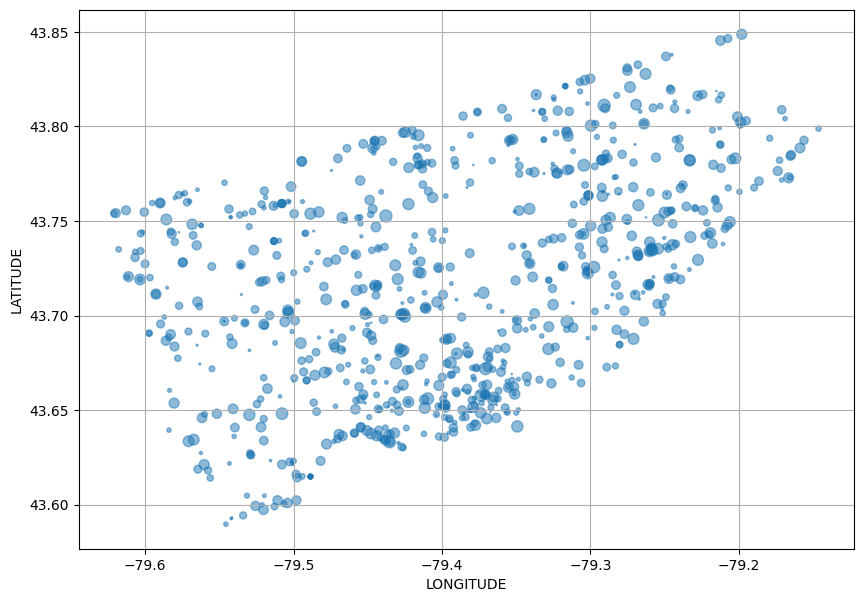

In [359]:
import matplotlib as plt

data.plot(kind="scatter", x='LONGITUDE', y='LATITUDE', grid=True, alpha=0.5,
         s="FATAL_NO",  figsize=(10,7))

### Correlationships of Numerical Data

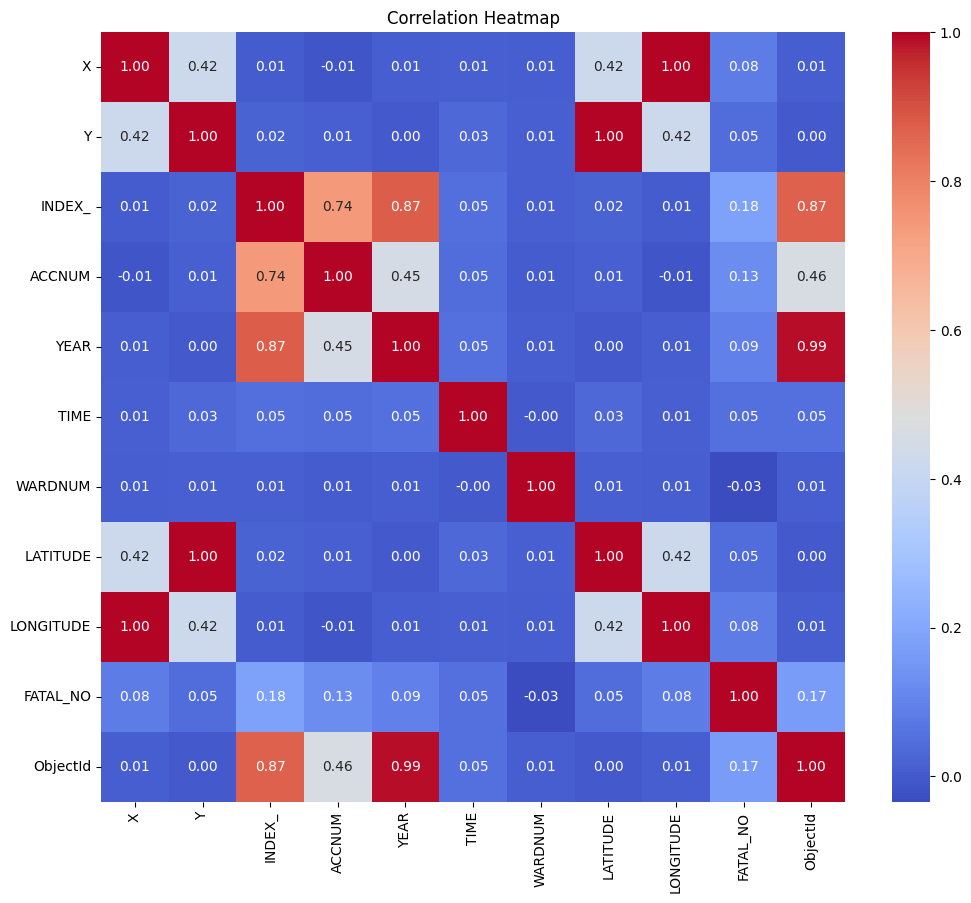

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before categorical data management, we can visualize the numerical data to get quick partial insights
num_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = num_data.corr()

# Create a heatmap. heatmap is more clear for multiple features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [361]:
# The heatmap is less meaningful before we thoroughly preprocess the data.
# We can have a piece of data to help us understand info from the heatmap.
# .head() only provides the ordered earlest data. Compare with randomized .sample() we can better understand the columns.

print(num_data.sample(5))
print(num_data.head(5))

                  X             Y    INDEX_     ACCNUM  YEAR  TIME  WARDNUM  \
5172  -8.862600e+06  5.427674e+06   5056987  1141084.0  2009  1303      1.0   
16350 -8.842522e+06  5.431998e+06  81515292  1186968.0  2020  2256     18.0   
13968 -8.855617e+06  5.427837e+06  80907679        NaN  2017   620      7.0   
15722 -8.828851e+06  5.432293e+06  80976027        NaN  2018  1731     22.0   
16978 -8.847226e+06  5.408115e+06  81455673        NaN  2019  1538      3.0   

        LATITUDE  LONGITUDE  FATAL_NO  ObjectId  
5172   43.755445 -79.614090       NaN      5173  
16350  43.783492 -79.433727       NaN     16351  
13968  43.756503 -79.551357       NaN     13969  
15722  43.785407 -79.310916       NaN     15723  
16978  43.628398 -79.475986       NaN     16979  
              X             Y   INDEX_    ACCNUM  YEAR  TIME  WARDNUM  \
0 -8.844611e+06  5.412414e+06  3387730  892658.0  2006   852      4.0   
1 -8.844611e+06  5.412414e+06  3387731  892658.0  2006   852      4.0   
2 -8.8

**Insights from the heatmap:**

1. "longitude" and "x", "latitude" and "y" are representing the same things, we just need to choose one pair of them.
2. From the comparison of head() and sample(), we can see "ObjectId", "indexing" are identifiers. No matter how they correlate to other features, we need to drop them. 
3. Anyway, we have a lot to do before letting the data tell the story.

<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>DATA MODELLING</h2>
</div>

## 1. Feature Selection

According to purpose, **measures of security, road condition, location, time** can be features, and the accident class can be target.

Discarded features:
- ids: 'INDEX_', 'ObjectId'
- irrevalent: 'ACCNUM',  'WARDNUM', 'VEHTYPE', 'PEDCOND', 'PEDCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
- duplicated features:
  - geographic data are overlapping, discard all except 'LATITUDE' and 'LONGITUDE'. As continuous numbers, they are capable to represent any exact location, and easy to process.
    - descarded: 'STREET1','STREET2', 'OFFSET', 'DISTRICT', 'INITDIR',  'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION'
  - 'DRIVCOND' can be replaced with 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY' the latter are binary and easy to process
- Alternative target columns:
    - These columns are not features. They can be useful for another topic.
    - 'IMPACTYPE', 'INVTYPE','INVAGE', 'INJURY', 'FATAL_NO', 'MANOEUVER', 'DRIVACT',

### Select and Drop Features

In [362]:
relavent_cols = ['YEAR', 'DATE', 'TIME',  # Time
                 'LATITUDE', 'LONGITUDE',  # Geographic data
                 'ROAD_CLASS', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT','RDSFCOND', # Road Condition
                 'DRIVCOND','SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', # Measures of security
                 'ACCLASS'] # Target class
df_selected = data[relavent_cols]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        18194 non-null  int64  
 1   DATE        18194 non-null  object 
 2   TIME        18194 non-null  int64  
 3   LATITUDE    18194 non-null  float64
 4   LONGITUDE   18194 non-null  float64
 5   ROAD_CLASS  17818 non-null  object 
 6   LOCCOORD    18099 non-null  object 
 7   TRAFFCTL    18160 non-null  object 
 8   VISIBILITY  18174 non-null  object 
 9   LIGHT       18194 non-null  object 
 10  RDSFCOND    18169 non-null  object 
 11  DRIVCOND    9240 non-null   object 
 12  SPEEDING    2575 non-null   object 
 13  AG_DRIV     9460 non-null   object 
 14  REDLIGHT    1520 non-null   object 
 15  ALCOHOL     788 non-null    object 
 16  DISABILITY  486 non-null    object 
 17  ACCLASS     18189 non-null  object 
dtypes: float64(2), int64(2), object(14)
memory usage: 2.5+ MB


### Get More Features from Date and Time

In [363]:
# The date and time are too trivial, we can translate them into month, weekdays, hours, to get more meaningful insights
# convert 'DATE' and 'TIME'
df_copy = df_selected.copy()
df_copy['DATE'] = pd.to_datetime(df_copy['DATE'])
df_copy['MONTH'] = df_copy['DATE'].dt.month
df_copy['WEEKDAY'] = df_copy['DATE'].dt.weekday
df_copy['HOUR'] = df_copy['TIME'] // 100 # max of TIME is 2359, so we assume it representing 23:59
df_copy.drop(['DATE', 'TIME'], axis=1, inplace=True)

print('Unique months: ', df_copy['MONTH'].unique())
print('Unique weekdays: ', df_copy['WEEKDAY'].unique())
print('Unique hours: ', df_copy['HOUR'].unique())
print(f'Current columns: ', df_copy.columns.values)

Unique months:  [ 3  1  6  7  8  5  2  4  9 10 11 12]
Unique weekdays:  [5 6 2 3 4 1 0]
Unique hours:  [ 8  9  2 19 20 10 15 13 17  0 12 16 18 21  1 14 11 23  3  7 22  6  5  4]
Current columns:  ['YEAR' 'LATITUDE' 'LONGITUDE' 'ROAD_CLASS' 'LOCCOORD' 'TRAFFCTL'
 'VISIBILITY' 'LIGHT' 'RDSFCOND' 'DRIVCOND' 'SPEEDING' 'AG_DRIV'
 'REDLIGHT' 'ALCOHOL' 'DISABILITY' 'ACCLASS' 'MONTH' 'WEEKDAY' 'HOUR']


## 2. Handle Null Values

### Null Value Distribution

In [364]:
# For missing values, we should use different stategy according to the features' natures
df_copy.isnull().sum()

YEAR              0
LATITUDE          0
LONGITUDE         0
ROAD_CLASS      376
LOCCOORD         95
TRAFFCTL         34
VISIBILITY       20
LIGHT             0
RDSFCOND         25
DRIVCOND       8954
SPEEDING      15619
AG_DRIV        8734
REDLIGHT      16674
ALCOHOL       17406
DISABILITY    17708
ACCLASS           5
MONTH             0
WEEKDAY           0
HOUR              0
dtype: int64

### Drop Suspicious Rows

In [365]:
# Since we have big size of data, we can drop the missing values in some columns missing few values.
# This is also helpful to get rid of poor records
few_miss_cols = df_copy.columns[df_copy.isnull().sum() < 500]
df_drop_records = df_copy.dropna(subset=few_miss_cols)
df_drop_records.isnull().sum()

YEAR              0
LATITUDE          0
LONGITUDE         0
ROAD_CLASS        0
LOCCOORD          0
TRAFFCTL          0
VISIBILITY        0
LIGHT             0
RDSFCOND          0
DRIVCOND       8675
SPEEDING      15244
AG_DRIV        8468
REDLIGHT      16165
ALCOHOL       16950
DISABILITY    17209
ACCLASS           0
MONTH             0
WEEKDAY           0
HOUR              0
dtype: int64

### Investigate and Impute Missing Values

In [366]:
# investigate the values in the rest columns that contains missing values
many_miss_cols = df_drop_records.columns[df_drop_records.isnull().sum() > 500]
for col in many_miss_cols:
    unique_values = df_drop_records[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'DRIVCOND': ['Unknown' nan 'Ability Impaired, Alcohol' 'Normal'
 'Ability Impaired, Alcohol Over .08' 'Inattentive' 'Had Been Drinking'
 'Medical or Physical Disability' 'Fatigue' 'Other'
 'Ability Impaired, Drugs']
Unique values in column 'SPEEDING': [nan 'Yes']
Unique values in column 'AG_DRIV': ['Yes' nan]
Unique values in column 'REDLIGHT': [nan 'Yes']
Unique values in column 'ALCOHOL': [nan 'Yes']
Unique values in column 'DISABILITY': [nan 'Yes']


In [367]:
# clearly, we should fill 'Unknown' to 'DRIVCOND', and 'No' for the rest
# In this case, advanced imputing techniques such as decision tree may not be realistic
df_nonull = df_drop_records.copy()
df_nonull.fillna({'DRIVCOND': 'Unknown'}, inplace=True)
df_nonull.fillna('No', inplace=True) # fill 'No' to all the rest
df_nonull.isnull().sum()

YEAR          0
LATITUDE      0
LONGITUDE     0
ROAD_CLASS    0
LOCCOORD      0
TRAFFCTL      0
VISIBILITY    0
LIGHT         0
RDSFCOND      0
DRIVCOND      0
SPEEDING      0
AG_DRIV       0
REDLIGHT      0
ALCOHOL       0
DISABILITY    0
ACCLASS       0
MONTH         0
WEEKDAY       0
HOUR          0
dtype: int64

## 3. Imbalance Classes

In [378]:
# check balance of target
df_nonull.ACCLASS.value_counts()

ACCLASS
0    15224
1     2461
Name: count, dtype: int64

The classes are imbalanced. Although RandomForest is the preference, we can resample it for better applicability.
For the same reason, we can transfer the target class to numeric.

In [369]:
# use map function to replace values in target column
# due to the low quantity and insignificant of "Property Damage Only", treat it the same as 'Non-Fatal Injury'
target_mapping = {'Fatal': 1, 'Property Damage Only': 0, 'Non-Fatal Injury': 0}
df_nonull['ACCLASS'] = df_nonull['ACCLASS'].replace(target_mapping)

pd.set_option('future.no_silent_downcasting', True) # surpress future warning

In [370]:
# resample the imbalanced classes
from sklearn.utils import resample

# Separate majority and minority classes
df_nonfatal = df_nonull[df_nonull.ACCLASS==0]
df_fatal  = df_nonull[df_nonull.ACCLASS==1]

# Upsample fatal class
df_fatal_upsampled = resample(df_fatal, replace=True, n_samples=15224, random_state=38)
df_balanced = pd.concat([df_nonfatal, df_fatal_upsampled])

df_balanced.ACCLASS.value_counts()

ACCLASS
0    15224
1    15224
Name: count, dtype: int64

## 4. Data Transformations

#### a. Stratify and split data 

In [371]:
# Before transformation, we need to split the data
from sklearn.model_selection import train_test_split
X = df_balanced.drop(['ACCLASS'], axis=1)
y = df_balanced['ACCLASS']

# Considering the standard of records may vary over time, we want to stratify the data according to the YEAR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['YEAR'], random_state=38)

#### b. Determine feature types and set transformers

In [372]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

In [379]:
# select numeric and categorical columns, and target
nums = ['YEAR','LATITUDE', 'LONGITUDE']
cats = ['ROAD_CLASS','LOCCOORD','TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'DRIVCOND', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'MONTH','DISABILITY',
       'WEEKDAY', 'HOUR']

In [380]:
# Make transformation pipeline
transformer = ColumnTransformer([
    ('scalar', StandardScaler(), nums),
    ('encoder', OneHotEncoder(), cats)
])

In [381]:
# fit and transform the dataset
transformer.fit_transform(X_train)
print(transformer.feature_names_in_)

['YEAR' 'LATITUDE' 'LONGITUDE' 'ROAD_CLASS' 'LOCCOORD' 'TRAFFCTL'
 'VISIBILITY' 'LIGHT' 'RDSFCOND' 'DRIVCOND' 'SPEEDING' 'AG_DRIV'
 'REDLIGHT' 'ALCOHOL' 'DISABILITY' 'MONTH' 'WEEKDAY' 'HOUR']
